<h1>Analyzing best location in Toronto to open an Indian restaurant</h1>
<p>IBM Data science professional certificate capstone project</p>
<img src="https://hips.hearstapps.com/del.h-cdn.co/assets/17/30/2048x1365/gallery-1501020555-shot-4-190.jpg?resize=980:*" width="100%" height="auto"></img>

<h2>Business Problem</h2>
<p>Toronto is the most populous and multicultural city in Canada, with more than 7.5 percent of the Canadian population residing there [1]. In a report by CIC news, Toronto is ranked third among new immigrants' preferred cities [2]. The Census of 2016 shows that most immigrants in Toronto are from India [3]. Therefore, This project hypothesize a client who wants to open an Indian restaurant in Toronto and aims to analyze a best possible location to do so. Target audient for this project is anyone who is planning to open an Indian restaurant in Toronto. <br><br> Overall, this project has following objectives:
<li>Discover location of Indian restaurants in neighborhoods of Toronto.</li>
<li>Analyze best possible location in Toronto to open a new Indian restaurant.</li></p>

<h2>Datasets</h2>
<br>
<p>This project makes use of a total of four datasets. The first one is Toronto neighborhood data scraped from Wikipedia. This data contains information regarding postal codes, regions and neighborhoods of Toronto. Secondly, Geospatial coordinates of neighborhoods of Toronto are read from the data provided by coursera (IBM) on the 3rd week of the capstone project. The third dataset is the postal codes and population of Toronto as per 2016 census obtained from statcan. These three data sets are used to explore neighborhoods with a large population. Lastly, the fourth dataset is about Indian restaurants in Toronto which is retrieved from Foursquare via RESTful API calls.</p>
<p>
    Following is the sources of data used for this project.
    <br>
    <li><a href="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M">Wikipedia: Toronto neighborhood data</a></li>
    <li>Coursera (IBM): Toronto geospatial coordiantes (Geospatial_Coordinates.csv)</li>
    <li><a href="https://foursquare.com/">Foursquare API: Indian Restaurants in Toronto</a></li>
    <li><a href="https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/details/page_Download-Telecharger.cfm?Lang=E&Tab=1&Geo1=PR&Code1=01&Geo2=PR&Code2=01&SearchText=01&SearchType=Begins&SearchPR=01&B1=All&TABID=3&type=0">Statcan: Canada population data</a></li>
</p>

<h2>Importing essential libraries</h2>
<p>In this section, python libraries necessary for this project have been imported. Imported libraries include pandas to work with dataframe, BeautifulSoup for web scraping, folium for visualization of geospatial data, numpy to work with arrays, sklearn for machine learning algorithm and matplotlib for data visualization.</p>

In [33]:
import pandas as pd
from pandas.io.json import json_normalize
import requests
from bs4 import BeautifulSoup
import folium
import numpy as np
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline 

<h2>Toronto neighbhorhood data</h2>
<p>In this section, Toronto neighborhood data has been scraped from wikipedia. Furhermore, "Geospatial_Coordinates.csv" file provided during 3rd week of this capestone project has beed utilized. By the end of this section, Toronto neighborhood data containing information regarding Regions, PostalCode, Neighborhood, Latitude, and Longitude will be ready for further processing.</p>

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html5lib")
table = soup.find_all("table")[0]
df = pd.DataFrame(columns=["PostalCode", "Regions", "Neighborhood"])

for row in table.find_all("tr"):
    for col in row.find_all("td"):
        PC = col.text[0:4].strip()
        TXT = col.text[4:len(col.text)].strip().replace(")", "").split("(")
        
        try:
            TXT[1]
        except:
            TXT.append(np.nan)
        df = df.append({"PostalCode": PC, "Regions": TXT[0], "Neighborhood": TXT[1]}, ignore_index=True)
        
df_updated = df[df["Regions"]!="Not assigned"].reset_index()
df_updated.drop("index", axis=1, inplace=True)
geocodes = pd.read_csv("Geospatial_Coordinates.csv")
geocodes.rename(columns = {"Postal Code":"PostalCode"}, inplace=True)
df_merged = df_updated.merge(geocodes, on="PostalCode")
df_merged.replace({"MississaugaCanada Post Gateway Processing Centre":"Mississauga Canada Post", "Downtown TorontoStn A PO Boxes25 The Esplanade": "Downtown Toronto Stn", "East TorontoBusiness reply mail Processing Centre969 Eastern": "East Toronto Business"}, inplace=True)
df_merged.head()

,PostalCode,Regions,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636
3,M6A,North York,Lawrence Manor / Lawrence Heights,43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


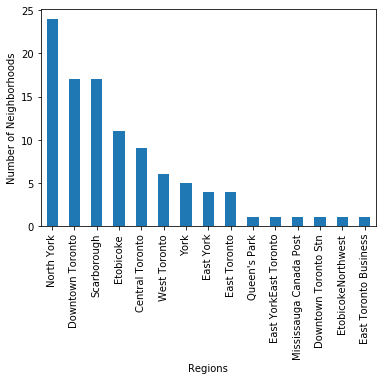

In [3]:
df_merged['Regions'].value_counts().plot(kind='bar', xlabel="Regions", ylabel="Number of Neighborhoods")

In [4]:
df_merged[df_merged["Regions"] == "Scarborough"]

,PostalCode,Regions,Neighborhood,Latitude,Longitude
6,M1B,Scarborough,Malvern / Rouge,43.806686,-79.194353
12,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497
18,M1E,Scarborough,Guildwood / Morningside / West Hill,43.763573,-79.188711
22,M1G,Scarborough,Woburn,43.770992,-79.216917
26,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
32,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
38,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park,43.727929,-79.262029
44,M1L,Scarborough,Golden Mile / Clairlea / Oakridge,43.711112,-79.284577
51,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West,43.716316,-79.239476
58,M1N,Scarborough,Birch Cliff / Cliffside West,43.692657,-79.264848


In [5]:
latitude = 43.6534817
longitude = -79.3839347
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10.45)

for lat, lng, region, neighborhood in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['Regions'], df_merged['Neighborhood']):
    label = '{}, {}'.format(neighborhood, region)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)

map_toronto

<h2>Indian Restaurants in Toronto data</h2>
<p>In this section, list of indian restaurants in Toronto neighborhood have been retrieved via RESTful API call to foursquare. As per data retrieved from Foursquare, there are total of 22 Indian restaurants in Toronto.</p>

In [6]:
CLIENT_ID = 'CRMXJD3G0DZV2VRXR52OQ5TY5LAVAVOPEQ0FDMQ1MCTLQ0B3' # your Foursquare ID
CLIENT_SECRET = 'BTGV2LNLRFVMZU2QB2OBR2OQSRHK0OBPC5FWMABX0GUZYW50' # your Foursquare Secret
ACCESS_TOKEN = '55CLD0NFKP3RMC5BFHFICIFZ50NV1TDH5VKB1EZ522QZNH54' # your FourSquare Access Token
VERSION = '20200604'
LIMIT = 10000

In [7]:
search_query = "indian"
radius = 30000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
restaurants = json_normalize(results['response']['venues'])
columns = ["name", "categories", "location.lat", "location.lng", "location.postalCode"]
restaurants_short = restaurants[columns]

for i,j in enumerate(restaurants_short["categories"]):
    try:
        if not len(j[0]["name"]) == 0:
            restaurants_short["categories"][i] = j[0]["name"]
    except:
        pass
    
restaurants_short = restaurants_short[restaurants_short["categories"] == "Indian Restaurant"].drop("categories", axis=1).dropna()
restaurants_short.columns = ["Name", "Latitude", "Longitude", "PostalCode"]
restaurants_short["PostalCode"] = restaurants_short["PostalCode"].map(lambda x: x[0:3].strip()) 
rest_with_region = restaurants_short.merge(df_merged, on="PostalCode")
rest_with_region.drop(["Latitude_x", "Longitude_x"], axis=1, inplace=True)
rest_with_region.rename(columns = {"Latitude_y": "Latitude", "Longitude_y": "Longitude"}, inplace=True)
rest_with_region.head()

,Name,PostalCode,Regions,Neighborhood,Latitude,Longitude
0,Aroma Fine Indian Restaurant,M5V,Downtown Toronto,CN Tower / King and Spadina / Railway Lands / ...,43.628947,-79.394420
1,309 Dhaba Indian Excellence,M5V,Downtown Toronto,CN Tower / King and Spadina / Railway Lands / ...,43.628947,-79.394420
2,Indian Biriyani House,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
3,Indian Biriyani House,M5H,Downtown Toronto,Richmond / Adelaide / King,43.650571,-79.384568
4,Chaska,M5H,Downtown Toronto,Richmond / Adelaide / King,43.650571,-79.384568


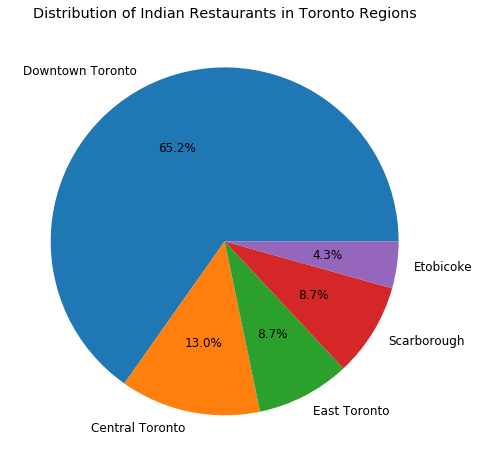

In [8]:
font = {'weight' : 'normal', 'size' : 12}
matplotlib.rc('font', **font)
rest_with_region['Regions'].value_counts().plot(kind="pie", ylabel="", title="Distribution of Indian Restaurants in Toronto Regions", autopct='%1.1f%%', figsize=(8,8))


In [9]:
map_indi = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, name, codes in zip(restaurants_short['Latitude'], restaurants_short['Longitude'], restaurants_short['Name'], restaurants_short['PostalCode']):
    label = '{},{}'.format(name,codes)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_indi)
    
map_indi

<h2>Toronto population data</h2>
<p>This section is inteded to read Toronto population data.</p>

In [10]:
pop = pd.read_csv('can_pop.csv', encoding = "ISO-8859-1")
col = ["Geographic code", "Population, 2016"]
population = pop[col]
population = population.rename(columns = {"Geographic code": "PostalCode", "Population, 2016": "Population"})
population.head()

,PostalCode,Population
0,01,35151728.0
1,A0A,46587.0
2,A0B,19792.0
3,A0C,12587.0
4,A0E,22294.0


In [11]:
population.drop(0, axis=0).reset_index().drop("index", axis=1).head()

,PostalCode,Population
0,A0A,46587.0
1,A0B,19792.0
2,A0C,12587.0
3,A0E,22294.0
4,A0G,35266.0


<h2>Preprocessing data for machine learning</h2>

In [12]:
rest_with_region.groupby("Neighborhood").count()
ind_rest_freq = pd.DataFrame(rest_with_region["Neighborhood"].value_counts())
other = df_merged[(~df_merged.Neighborhood.isin(ind_rest_freq.Neighborhood))]
other['Indian_Restaurants'] = 0
ind_rest_freq = ind_rest_freq.reset_index()
ind_rest_freq.rename(columns = {"index":"Neighborhood", "Neighborhood":"Indian_Restaurants"}, inplace=True)
ind_rest_freq_post = ind_rest_freq.merge(rest_with_region, on="Neighborhood")
ind_rest_freq_post.drop("Name", axis=1, inplace=True)
ind_rest_freq_post = pd.concat([ind_rest_freq_post, other], axis=0)
ind_freq_pop = ind_rest_freq_post.merge(population, on="PostalCode")
ind_freq_pop.drop_duplicates(subset='PostalCode', keep='first', inplace=True)
ind_freq_pop['Population'][12] = ind_freq_pop['Population'].mean()
ind_freq_pop['Population'][18] = ind_freq_pop['Population'].mean()
ind_freq_pop['Population'][74] = ind_freq_pop['Population'].mean()
clustering_cols = ["Neighborhood", "Indian_Restaurants", "Population"]
clustering_df = ind_freq_pop[clustering_cols].reset_index()
clustering_df.head()

,index,Neighborhood,Indian_Restaurants,Population
0,0,Harbourfront East / Union Station / Toronto Is...,3,14545.0
1,4,CN Tower / King and Spadina / Railway Lands / ...,2,49195.0
2,7,Richmond / Adelaide / King,2,2005.0
3,10,The Annex / North Midtown / Yorkville,2,26496.0
4,13,Christie,2,32086.0


In [13]:
clustering_df.drop("index", axis=1).head()

,Neighborhood,Indian_Restaurants,Population
0,Harbourfront East / Union Station / Toronto Is...,3,14545.0
1,CN Tower / King and Spadina / Railway Lands / ...,2,49195.0
2,Richmond / Adelaide / King,2,2005.0
3,The Annex / North Midtown / Yorkville,2,26496.0
4,Christie,2,32086.0


[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Population in Toronto by regions')]

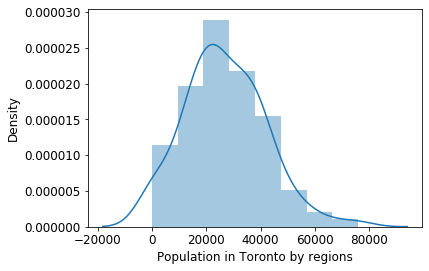

In [14]:
#ind_freq_pop.plot(kind="hist", y="Population", ylabel="")
ax = sns.distplot(ind_freq_pop["Population"], bins=8, label="density")
ax.set(xlabel='Population in Toronto by regions', ylabel='Density')

In [15]:
region_pop = ind_rest_freq_post.merge(population, on="PostalCode").groupby("Regions").sum().drop(["Latitude", "Longitude"], axis=1)
region_pop = region_pop.reset_index()


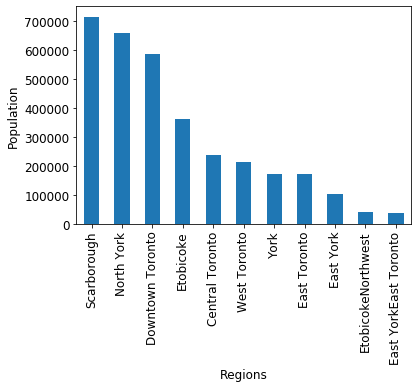

In [16]:
region_pop = ind_rest_freq_post.merge(population, on="PostalCode").groupby("Regions").sum().drop(["Latitude", "Longitude"], axis=1)
region_pop = region_pop[~(region_pop["Population"]<100)].sort_values(by="Population", ascending=False)
region_pop["Population"].plot(kind="bar", x="Regions", y="Population", ylabel="Population")

In [17]:
region_pop.sort_values(by="Population", ascending=True)

,Indian_Restaurants,Population
Regions,,
East YorkEast Toronto,0,35738.0
EtobicokeNorthwest,0,40684.0
East York,0,104258.0
East Toronto,2,171285.0
York,0,171388.0
West Toronto,0,212782.0
Central Toronto,5,237533.0
Etobicoke,1,362609.0
Downtown Toronto,27,585841.0


<h2>Normalizing data</h2>

In [18]:
scaler = MinMaxScaler()
scaler.fit(clustering_df[["Population"]])
clustering_df["Population"] = scaler.fit_transform(clustering_df[["Population"]])
clustering_df["Indian_Restaurants"] = scaler.fit_transform(clustering_df[["Indian_Restaurants"]])
clustering_df.head()

,index,Neighborhood,Indian_Restaurants,Population
0,0,Harbourfront East / Union Station / Toronto Is...,1.000000,0.191641
1,4,CN Tower / King and Spadina / Railway Lands / ...,0.666667,0.648181
2,7,Richmond / Adelaide / King,0.666667,0.026417
3,10,The Annex / North Midtown / Yorkville,0.666667,0.349105
4,13,Christie,0.666667,0.422757


In [19]:
clustering_df.drop("index", axis=1).head()

,Neighborhood,Indian_Restaurants,Population
0,Harbourfront East / Union Station / Toronto Is...,1.000000,0.191641
1,CN Tower / King and Spadina / Railway Lands / ...,0.666667,0.648181
2,Richmond / Adelaide / King,0.666667,0.026417
3,The Annex / North Midtown / Yorkville,0.666667,0.349105
4,Christie,0.666667,0.422757


<h2>Machine learning: Clustering</h2>

Text(0.5, 1.0, 'Inertia v/s Number of clusters')

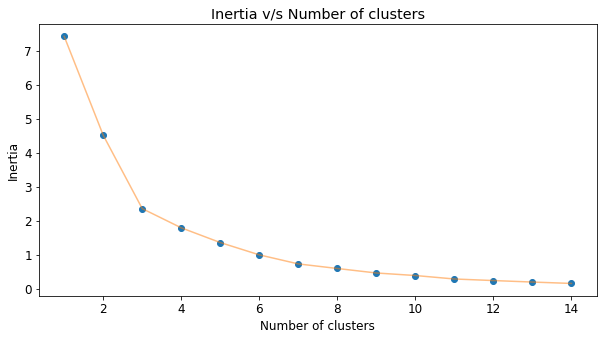

In [20]:
inertia = []
k = []
k_values = [1,15]

for i in range(k_values[0], k_values[1]):
    model = KMeans(n_clusters = i).fit(clustering_df[["Indian_Restaurants", "Population"]])
    inertia.append(model.inertia_)
    k.append(i)

fig = plt.figure(figsize=(10,5))
plt.plot(k, inertia, 'o')
plt.plot(k, inertia, '-', alpha=0.5)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia v/s Number of clusters')

In [21]:
kclusters = 3
kmc = KMeans(n_clusters=kclusters).fit(clustering_df[["Indian_Restaurants", "Population"]])
ind_freq_pop["cluster"] = kmc.labels_

<h2>Results</h2>
<p>The restaurant data has been subdivided into 4 clusters.</p>

In [22]:
map_cluster = folium.Map(location=[latitude, longitude], zoom_start=10)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

for lat, lng, name, codes, cluster in zip(ind_freq_pop['Latitude'], ind_freq_pop['Longitude'], ind_freq_pop['Regions'], ind_freq_pop['PostalCode'], ind_freq_pop['cluster']):
    label = '{},{}'.format(name,codes)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cluster)
    
map_cluster

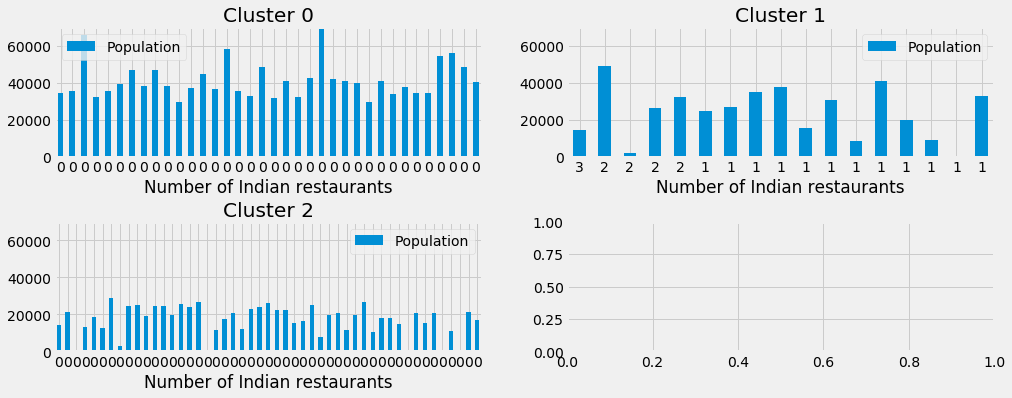

In [32]:
cluster0 = ind_freq_pop[ind_freq_pop['cluster'] == 0]
cluster1 = ind_freq_pop[ind_freq_pop['cluster'] == 1]
cluster2 = ind_freq_pop[ind_freq_pop['cluster'] == 2]
#cluster4 = ind_freq_pop[ind_freq_pop['cluster'] == 3]

fig, axes = plt.subplots(2,2)
plt.style.use('fivethirtyeight')
plt.subplots_adjust(top = 0.5, bottom=0.05, hspace=0.5)

cluster0.plot(kind="bar",x='Indian_Restaurants', y='Population', ax=axes[0,0], figsize=(15,10), ylim=(0,70000), xlabel='Number of Indian restaurants', title='Cluster 0', rot=0)
cluster1.plot(kind="bar",x='Indian_Restaurants', y='Population', ax=axes[0,1], figsize=(15,10), ylim=(0,70000), xlabel='Number of Indian restaurants', title='Cluster 1', rot=0)
cluster2.plot(kind="bar",x='Indian_Restaurants', y='Population', ax=axes[1,0], figsize=(15,10), ylim=(0,70000), xlabel='Number of Indian restaurants', title='Cluster 2', rot=0)
#cluster4.plot(kind="bar",x='Indian_Restaurants', y='Population', ax=axes[1,1], figsize=(15,10), ylim=(0,70000), xlabel='Number of Indian restaurants', title='Cluster 4', rot=0)

<h2>Conclusion</h2>
<p>
As per results, cluster 1 is the highly recommeded neighborhoods in Toronto to open a new Indian restaurant. This is because cluster 1 includes neighbhorhoods with relatively large population with no Indian restaurants and hence no competition. On the other hand, cluster 3 is the least recommended neighbhorhood in Toronto. This is because cluster 3 has relatively less population with atleast 2 Indian restaurants which may create a competitive environment. Furthermore, after cluster 1, cluster 4 and cluster 2 are ranked 2nd and 4th in recommendation respectively.
    <br>
<br>
    Overall, following is the list of clusters ranked by recommendation
    <br>
        1. <b>Cluster 0</b> (Large population (Mean: 41,511), No Indian restaurant)<br><b>Highest Recommendation for Cluster 0:</b>  Willowdale South (Population: 75,897; Indian Restaurants: 0)
    <br>
    <br>
        2. <b>Cluster 1</b> (Low to Medium population (Mean: 23,472), at least 1 Indian restaurant)<br><b>Highest Recommendation for Cluster 1:</b> Regent Park / Harbourfront (Population: 41,078; Indian Restaurants: 1)
    <br>
    <br>
        3.<b>Cluster 2</b> (Low to Medium population (Mean: 17,011), No Indian restaurants)<br><b>Highest Recommendation for Cluster 2:</b> Glencairn (Population: 28,522; Indian Restaurants: 0)
</p>

In [27]:
print("Mean population of cluster 0 is: ", cluster0['Population'].mean())
cluster0 = cluster0[cluster0['Indian_Restaurants']==cluster0['Indian_Restaurants'].min()]
max_pop_n = cluster0[cluster0['Population']==cluster0['Population'].max()]['Neighborhood'].values[0]
max_pop = cluster0[cluster0['Population']==cluster0['Population'].max()]['Population'].values[0]
n_rest = cluster0[cluster0['Population']==cluster0['Population'].max()]['Indian_Restaurants'].values[0]
print("Highest Recommendation: ", max_pop_n, "( Population: ",max_pop,", Indian Restaurants: ", n_rest,")")
cluster0.sort_values(by="Population", ascending=False).head()

Mean population of cluster 0 is:  41511.27777777778
Highest Recommendation:  WillowdaleSouth ( Population:  75897.0 , Indian Restaurants:  0 )


,Neighborhood,Indian_Restaurants,PostalCode,Regions,Latitude,Longitude,Population,cluster
89,WillowdaleSouth,0,M2N,North York,43.770120,-79.408493,75897.0,0
45,Malvern / Rouge,0,M1B,Scarborough,43.806686,-79.194353,66108.0,0
68,Fairview / Henry Farm / Oriole,0,M2J,North York,43.778517,-79.346556,58293.0,0
112,South Steeles / Silverstone / Humbergate / Jam...,0,M9V,Etobicoke,43.739416,-79.588437,55959.0,0
110,Milliken / Agincourt North / Steeles East / L'...,0,M1V,Scarborough,43.815252,-79.284577,54680.0,0


In [31]:
print("Mean population of cluster 1 is: ", cluster1['Population'].mean())
cluster1 = cluster1[cluster1['Indian_Restaurants']==cluster1['Indian_Restaurants'].min()]
max_pop_n = cluster1[cluster1['Population']==cluster1['Population'].max()]['Neighborhood'].values[0]
max_pop = cluster1[cluster1['Population']==cluster1['Population'].max()]['Population'].values[0]
n_rest = cluster1[cluster1['Population']==cluster1['Population'].max()]['Indian_Restaurants'].values[0]
print("Highest Recommendation: ", max_pop_n, "( Population: ",max_pop,", Indian Restaurants: ", n_rest,")")
cluster1.sort_values(by="Population", ascending=False).head()

Mean population of cluster 1 is:  23472.72303921569
Highest Recommendation:  Regent Park / Harbourfront ( Population:  41078.0 , Indian Restaurants:  1 )


,Neighborhood,Indian_Restaurants,PostalCode,Regions,Latitude,Longitude,Population,cluster
30,Regent Park / Harbourfront,1,M5A,Downtown Toronto,43.654260,-79.360636,41078.0,1
22,New Toronto / Mimico South / Humber Bay Shores,1,M8V,Etobicoke,43.605647,-79.501321,37975.0,1
20,Golden Mile / Clairlea / Oakridge,1,M1L,Scarborough,43.711112,-79.284577,35081.0,1
38,India Bazaar / The Beaches West,1,M4L,East Toronto,43.668999,-79.315572,32640.0,1
26,Church and Wellesley,1,M4Y,Downtown Toronto,43.665860,-79.383160,30472.0,1


In [30]:
print("Mean population of cluster 2 is: ", cluster2['Population'].mean())
cluster2 = cluster2[cluster2['Indian_Restaurants']==cluster2['Indian_Restaurants'].min()]
max_pop_n = cluster2[cluster2['Population']==cluster2['Population'].max()]['Neighborhood'].values[0]
max_pop = cluster2[cluster2['Population']==cluster2['Population'].max()]['Population'].values[0]
n_rest = cluster2[cluster2['Population']==cluster2['Population'].max()]['Indian_Restaurants'].values[0]
print("Highest Recommendation: ", max_pop_n, "( Population: ",max_pop,", Indian Restaurants: ", n_rest,")")
print(cluster2.shape)
cluster2.sort_values(by="Population", ascending=False).head()

Mean population of cluster 2 is:  17011.275645552338
Highest Recommendation:  Glencairn ( Population:  28522.0 , Indian Restaurants:  0 )
(49, 8)


,Neighborhood,Indian_Restaurants,PostalCode,Regions,Latitude,Longitude,Population,cluster
49,Glencairn,0,M6B,North York,43.709577,-79.445073,28522.000000,2
74,DownsviewEast,0,M3K,North York,43.737473,-79.464763,26601.506632,2
105,Davisville,0,M4S,Central Toronto,43.704324,-79.388790,26506.000000,2
85,Bedford Park / Lawrence Manor East,0,M5M,North York,43.733283,-79.419750,25975.000000,2
69,Northwood Park / York University,0,M3J,North York,43.767980,-79.487262,25473.000000,2


<h3>References</h3>
<p>
1. <a href="https://en.wikipedia.org/wiki/List_of_the_largest_municipalities_in_Canada_by_population">https://en.wikipedia.org/wiki/List_of_the_largest_municipalities_in_Canada_by_population</a><br>
2. <a href="https://www.cicnews.com/2020/02/which-cities-in-canada-attract-the-most-immigrants-0213741.html#gs.6um8t1">https://www.cicnews.com/2020/02/which-cities-in-canada-attract-the-most-immigrants-0213741.html#gs.6um8t1</a><br>
3. <a href="https://www12.statcan.gc.ca/census-recensement/2016/as-sa/fogs-spg/Facts-cma-eng.cfm?LANG=Eng&GK=CMA&GC=535&TOPIC=7">https://www12.statcan.gc.ca/census-recensement/2016/as-sa/fogs-spg/Facts-cma-eng.cfm?LANG=Eng&GK=CMA&GC=535&TOPIC=7</a><br>
</p>